Importo las librerías necesarias

In [1]:
import pandas as pd
import numpy as npb
import seaborn as sns
import sys
sys.path.append('./src/')
%load_ext autoreload
%autoreload 2


Importo el dataset y lo guardo en mi varible.

In [2]:
df = pd.read_csv('../attacks.csv', encoding = 'cp1252')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compruebo las columnas Case Number, Case Number 1 y 2 tienen valores iguales

In [4]:
(df[
    (df["Case Number"] == df["Case Number.1"])
    & 
    (df["Case Number"] == df["Case Number.2"])
].shape)


(6278, 24)

Ahora puedo borrar las dos columnas.

In [4]:
df.drop(columns = ["Case Number.1", "Case Number.2"], inplace = True)

In [5]:
df_usa = df[(df["Country"]== "USA")]
df_aust = df[(df["Country"]== "AUSTRALIA")]

In [6]:
data_usa = df_usa[["Case Number","Country","Date", "Year", "Type", "Activity", "Injury", "Fatal (Y/N)"]]


In [7]:
data_aust = df_aust[["Case Number","Country","Date", "Year", "Type", "Activity", "Injury", "Fatal (Y/N)"]]


Al comprobar que los indeces se han quedado los del primer dataset, los reinicio.


In [8]:
data_usa = data_usa.reset_index(drop=True)


In [9]:
data_aust = data_aust.reset_index(drop=True)


In [10]:
data_usa.dtypes

Case Number     object
Country         object
Date            object
Year           float64
Type            object
Activity        object
Injury          object
Fatal (Y/N)     object
dtype: object

In [11]:
data_aust.dtypes

Case Number     object
Country         object
Date            object
Year           float64
Type            object
Activity        object
Injury          object
Fatal (Y/N)     object
dtype: object

No me gusta el nombre de la columna Fatal (Y/N) la cambio por Fatal

In [12]:
data_aust.rename(columns = {'Fatal (Y/N)': 'Fatal'},inplace = True)

In [13]:
data_usa.rename(columns = {'Fatal (Y/N)': 'Fatal'}, inplace = True)

Analizo si la columna de Year, los años esta bien, ya que he detectado varios error.

Le aplico una función regex, comparando los datos de la columna Date con la de Year

In [16]:
import re

def date_year(x):
    mat = ''
    #pattern = (r'(\w{4})(\.b)?(\ )?(\.)?(\?)?(s)?$')
    pattern = (r'(\w{4})(\.\w)?(\ )?(\?)?(s)?(`)?(\.00.)?(\.)?$')
    matches = re.search(pattern, x)
    
    return matches.group(1)

#esto lo tengo que poner en dentro de la funcion

Genero una nueva columna Year con los datos devueltos por la funcion data_year

In [17]:
new_date = []

for dat in data_usa.Date:
    try:
        new_date.append(int(date_year(dat)))
    except:
        new_date.append(0)

In [18]:
data_usa.Year = new_date


Encuetro el valor que me esta fallando en data_usa y borro esa columna, ya que el valor es solo 1

In [19]:
new = data_usa.loc[data_usa['Year'] == 0, "Year"]


2218    0
Name: Year, dtype: int64

In [21]:
data_usa.drop(data_usa[data_usa['Year']== 0].index, inplace = True)


In [22]:
data_usa.groupby('Year').count()

,Case Number,Country,Date,Type,Activity,Injury,Fatal
Year,,,,,,,
1642,1,1,1,1,1,1,1
1751,1,1,1,1,1,1,1
1771,1,1,1,1,1,1,1
1779,1,1,1,1,1,1,1
1780,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
2014,66,66,66,66,63,66,63
2015,73,73,73,73,67,73,66
2016,64,64,64,64,60,64,59


In [23]:
new_date = []

for dat in data_aust.Date:
    try:
        new_date.append(int(date_year(dat)))
    except:
        new_date.append(0)

data_aust.Year = new_date

In [24]:
new = data_aust.loc[data_aust['Year'] == 0, "Year"]

In [25]:
data_aust.drop(data_aust[data_aust['Year']== 0].index, inplace = True)

In [26]:
data_aust.groupby('Year').count()

,Case Number,Country,Date,Type,Activity,Injury,Fatal
Year,,,,,,,
1788,1,1,1,1,1,1,1
1791,1,1,1,1,0,1,1
1803,1,1,1,1,0,1,1
1804,1,1,1,1,0,1,1
1807,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...
2014,29,29,29,29,28,29,27
2015,31,31,31,30,31,31,29
2016,32,32,32,32,32,32,30


In [27]:
new_usa = data_usa.loc[lambda df: df.Fatal == 'Y']

In [28]:
new_aust = data_aust.loc[lambda df: df.Fatal == 'Y']

In [29]:
new_usa.groupby('Fatal').sum()

,Year
Fatal,
Y,358647


In [30]:
new_aust.groupby('Fatal').sum()

,Year
Fatal,
Y,545511


In [33]:
new_usa.to_csv('./data_usa.csv',index=False)

In [34]:
new_aust.to_csv('./data_aust.csv',index=False)

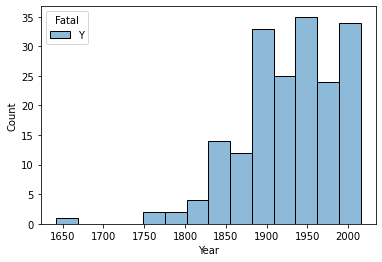

In [37]:
sns_usa = sns.histplot(x=new_usa.Year,hue =new_usa.Fatal)

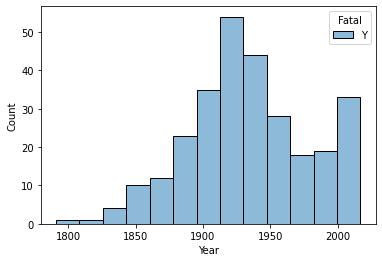

In [38]:
sns_aust = sns.histplot(x=new_aust.Year,hue =new_aust.Fatal)

In [41]:
sns_usa.figure.savefig("Usa", dpi=1000)

In [43]:
sns_aust.figure.savefig("Australia", dpi=1000)